# Flattening the COVID-19 Curve



### Context

Coronaviruses are a large family of viruses which may cause illness in animals or humans. In humans, several coronaviruses are known to cause respiratory infections ranging from the common cold to more severe diseases such as Middle East Respiratory Syndrome (MERS) and Severe Acute Respiratory Syndrome (SARS). The most recently discovered coronavirus causes coronavirus disease COVID-19 - World Health Organization

The number of new cases are increasing day by day around the world. This dataset has information from the states and union territories of India at daily level.

State level data comes from Ministry of Health & Family Welfare

Individual level data comes from covid19india


### Inspiration

Looking for data based suggestions to stop / delay the spread of virus


### Acknowledgements


Thanks to Indian Ministry of Health & Family Welfare for making the data available to general public.

Thanks to covid19india.org for making the individual level details and testing details available to general public.

Thanks to Wikipedia for population information.

Photo Courtesy - https://hgis.uw.edu/virus/

In [4]:
#Loading required packages

import numpy as np
import csv
import matplotlib.pyplot as plt
import os
import pandas as pd
import tarfile
from six.moves import urllib

Note : All data files are saved under covid_india/ directory

In [7]:
for dirname, _, filenames in os.walk('/home/yash/projects/prediction_project/covid_india'):
    for filename in filenames:
        print(os.path.join(filename))

population_india_census2011.csv
HospitalBedsIndia.csv
AgeGroupDetails.csv
ICMRTestingLabs.csv
ICMRTestingDetails.csv
covid_19_india.csv
StatewiseTestingDetails.csv
IndividualDetails.csv


In [11]:
#Initialising Age Group Details
age_group_data = pd.read_csv('/home/yash/projects/prediction_project/covid_india/AgeGroupDetails.csv')
age_group_data.head()

,Sno,AgeGroup,TotalCases,Percentage
0,1,0-9,22,3.18%
1,2,10-19,27,3.90%
2,3,20-29,172,24.86%
3,4,30-39,146,21.10%
4,5,40-49,112,16.18%


In [14]:
hospital_beds_india = pd.read_csv('/home/yash/projects/prediction_project/covid_india/HospitalBedsIndia.csv')
hospital_beds_india.head()

,Sno,State/UT,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18,Unnamed: 12,Unnamed: 13
0,1.0,Andaman & Nicobar Islands,27,4,NaN,3,34,1246,27.0,575.0,3.0,500.0,NaN,NaN
1,2.0,Andhra Pradesh,1417,198,31,20,1666,60799,193.0,6480.0,65.0,16658.0,NaN,NaN
2,3.0,Arunachal Pradesh,122,62,NaN,15,199,2320,208.0,2136.0,10.0,268.0,NaN,NaN
3,4.0,Assam,1007,166,14,33,1220,19115,1176.0,10944.0,50.0,6198.0,NaN,NaN
4,5.0,Bihar,2007,63,33,43,2146,17796,930.0,6083.0,103.0,5936.0,NaN,NaN


In [15]:
hospital_beds_india.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Sno                               37 non-null     float64
 1   State/UT                          37 non-null     object 
 2   NumPrimaryHealthCenters_HMIS      37 non-null     object 
 3   NumCommunityHealthCenters_HMIS    37 non-null     object 
 4   NumSubDistrictHospitals_HMIS      30 non-null     object 
 5   NumDistrictHospitals_HMIS         37 non-null     object 
 6   TotalPublicHealthFacilities_HMIS  37 non-null     object 
 7   NumPublicBeds_HMIS                37 non-null     object 
 8   NumRuralHospitals_NHP18           37 non-null     float64
 9   NumRuralBeds_NHP18                37 non-null     float64
 10  NumUrbanHospitals_NHP18           37 non-null     float64
 11  NumUrbanBeds_NHP18                37 non-null     float64
 12  Unnamed: 1

In [18]:
covid_19_india = pd.read_csv('/home/yash/projects/prediction_project/covid_india/covid_19_india.csv')
covid_19_india.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [21]:
icmr_test_details = pd.read_csv('/home/yash/projects/prediction_project/covid_india/ICMRTestingDetails.csv')
icmr_test_details.head()

,SNo,DateTime,TotalSamplesTested,TotalIndividualsTested,TotalPositiveCases,Source
0,1,13/03/20 18:00,6500.0,5900.0,78.0,Press_Release_ICMR_13March2020.pdf
1,2,18/03/20 18:00,13125.0,12235.0,150.0,ICMR_website_update_18March_6PM_IST.pdf
2,3,19/03/20 18:00,14175.0,13285.0,182.0,ICMR_website_update_19March_6PM_IST.pdf
3,4,20/03/20 18:00,15404.0,14514.0,236.0,ICMR_website_update_20March_6PM_IST.pdf
4,5,21/03/20 18:00,16911.0,16021.0,315.0,ICMR_website_update_21March_6PM_IST.pdf


In [22]:
population_census_2011 = pd.read_csv('/home/yash/projects/prediction_project/covid_india/population_india_census2011.csv')
population_census_2011.head()

,Sno,State / Union Territory,Population,Rural population,Urban population,Area,Density,Gender Ratio
0,1,Uttar Pradesh,199812341,155317278,44495063,"240,928 km2 (93,023 sq mi)","828/km2 (2,140/sq mi)",912
1,2,Maharashtra,112374333,61556074,50818259,"307,713 km2 (118,809 sq mi)",365/km2 (950/sq mi),929
2,3,Bihar,104099452,92341436,11758016,"94,163 km2 (36,357 sq mi)","1,102/km2 (2,850/sq mi)",918
3,4,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953
4,5,Madhya Pradesh,72626809,52557404,20069405,"308,245 km2 (119,014 sq mi)",236/km2 (610/sq mi),931


In [23]:
population_census_2011.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Sno                      36 non-null     int64 
 1   State / Union Territory  36 non-null     object
 2   Population               36 non-null     int64 
 3   Rural population         36 non-null     int64 
 4   Urban population         36 non-null     int64 
 5   Area                     36 non-null     object
 6   Density                  36 non-null     object
 7   Gender Ratio             36 non-null     int64 
dtypes: int64(5), object(3)
memory usage: 2.4+ KB


In [26]:
age_details = pd.read_csv('/home/yash/projects/prediction_project/covid_india/AgeGroupDetails.csv')
age_details.head(10)

,Sno,AgeGroup,TotalCases,Percentage
0,1,0-9,22,3.18%
1,2,10-19,27,3.90%
2,3,20-29,172,24.86%
3,4,30-39,146,21.10%
4,5,40-49,112,16.18%
5,6,50-59,77,11.13%
6,7,60-69,89,12.86%
7,8,70-79,28,4.05%
8,9,>=80,10,1.45%
9,10,Missing,9,1.30%


In [27]:
age_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Sno         10 non-null     int64 
 1   AgeGroup    10 non-null     object
 2   TotalCases  10 non-null     int64 
 3   Percentage  10 non-null     object
dtypes: int64(2), object(2)
memory usage: 448.0+ bytes


In [29]:
age_details.shape

(10, 4)

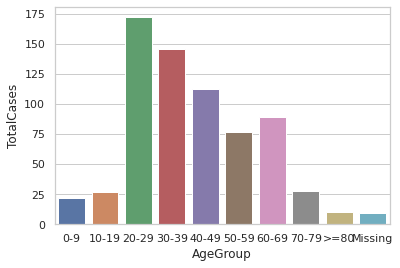

In [32]:
#Plotting a bar graph of Age Group vs Total Cases

%matplotlib inline
import seaborn as sb

sb.set()
sb.set(style="whitegrid")
axis = sb.barplot(x="AgeGroup", y="TotalCases", data = age_details)

In [34]:
#Let us look at covid_19_data
covid_19_india.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863 entries, 0 to 862
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       863 non-null    int64 
 1   Date                      863 non-null    object
 2   Time                      863 non-null    object
 3   State/UnionTerritory      863 non-null    object
 4   ConfirmedIndianNational   863 non-null    object
 5   ConfirmedForeignNational  863 non-null    object
 6   Cured                     863 non-null    int64 
 7   Deaths                    863 non-null    int64 
 8   Confirmed                 863 non-null    int64 
dtypes: int64(4), object(5)
memory usage: 60.8+ KB


In [35]:
covid_19_india.describe()

,Sno,Cured,Deaths,Confirmed
count,863.000000,863.000000,863.000000,863.000000
mean,432.000000,5.190035,1.754345,66.385863
std,249.270937,13.868492,6.939239,151.427341
min,1.000000,0.000000,0.000000,1.000000
25%,216.500000,0.000000,0.000000,3.000000
50%,432.000000,0.000000,0.000000,13.000000
75%,647.500000,3.000000,1.000000,47.000000
max,863.000000,188.000000,110.000000,1574.000000


In [36]:
covid_19_india.shape

(863, 9)

In [38]:
covid_19_india.sample(10)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
748,749,08/04/20,5:00 PM,Gujarat,-,-,25,13,165
743,744,08/04/20,5:00 PM,Bihar,-,-,0,1,38
360,361,25/03/20,6:00 PM,Jammu and Kashmir,7,0,1,0,7
278,279,22/03/20,6:00 PM,Kerala,45,7,3,0,52
611,612,03/04/20,6:00 PM,Rajasthan,-,-,3,0,167
612,613,03/04/20,6:00 PM,Tamil Nadu,-,-,6,1,309
599,600,03/04/20,6:00 PM,Jammu and Kashmir,-,-,3,2,75
833,834,11/04/20,8:00 AM,Andaman and Nicobar Islands,-,-,0,0,11
230,231,20/03/20,6:00 PM,Delhi,16,1,5,1,17
626,627,04/04/20,6:00 PM,Goa,-,-,0,0,7


In [42]:
covid_19_india['totalindian'] = (covid_19_india['Cured']+covid_19_india['Deaths']+covid_19_india['Confirmed'])

In [48]:
#total counted indians by state
covid_19_india.groupby('State/UnionTerritory')['totalindian'].sum()

State/UnionTerritory
Andaman and Nicobar Islands      149
Andhra Pradesh                  2755
Arunachal Pradesh                  9
Assam                            238
Bihar                            491
Chandigarh                       308
Chhattisgarh                     226
Delhi                           6648
Goa                               98
Gujarat                         2530
Haryana                         1972
Himachal Pradesh                 215
Jammu and Kashmir               1585
Jharkhand                         63
Karnataka                       2651
Kerala                          6041
Ladakh                           452
Madhya Pradesh                  2485
Maharashtra                    11936
Manipur                           31
Mizoram                           18
Odisha                           326
Puducherry                        76
Punjab                          1343
Rajasthan                       3920
Tamil Nadu                      6621
Telengana        

In [47]:
#Territory wise value counts
covid_19_india['State/UnionTerritory'].value_counts()

Kerala                         73
Telengana                      41
Delhi                          41
Rajasthan                      40
Uttar Pradesh                  39
Haryana                        39
Tamil Nadu                     36
Ladakh                         36
Maharashtra                    34
Karnataka                      34
Jammu and Kashmir              34
Punjab                         34
Andhra Pradesh                 31
Uttarakhand                    28
Odisha                         27
Puducherry                     25
West Bengal                    25
Chhattisgarh                   24
Chandigarh                     24
Gujarat                        23
Himachal Pradesh               22
Madhya Pradesh                 22
Bihar                          21
Manipur                        19
Mizoram                        18
Andaman and Nicobar Islands    17
Goa                            17
Assam                          11
Jharkhand                      11
Arunachal Prad

Text(0.5, 0, 'totalindian')

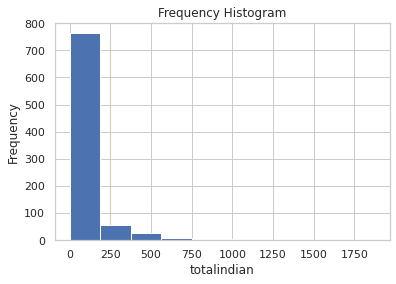

In [55]:
#plotting a histogram of age

covid_19_india['totalindian'].plot(kind='hist')
plt.title('Frequency Histogram')
plt.xlabel('totalindian')

In [52]:
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
covid_19_india.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,totalIndian,totalindian
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1,1,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1,1,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2,2,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3,3,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3,3,3


In [57]:
data_covid = covid_19_india[covid_19_india['Date']>'24/02/20']

fig = px.bar(data_covid, x=data_covid['State/UnionTerritory'], y='totalindian', color='totalindian',height=600)
py.iplot(fig)

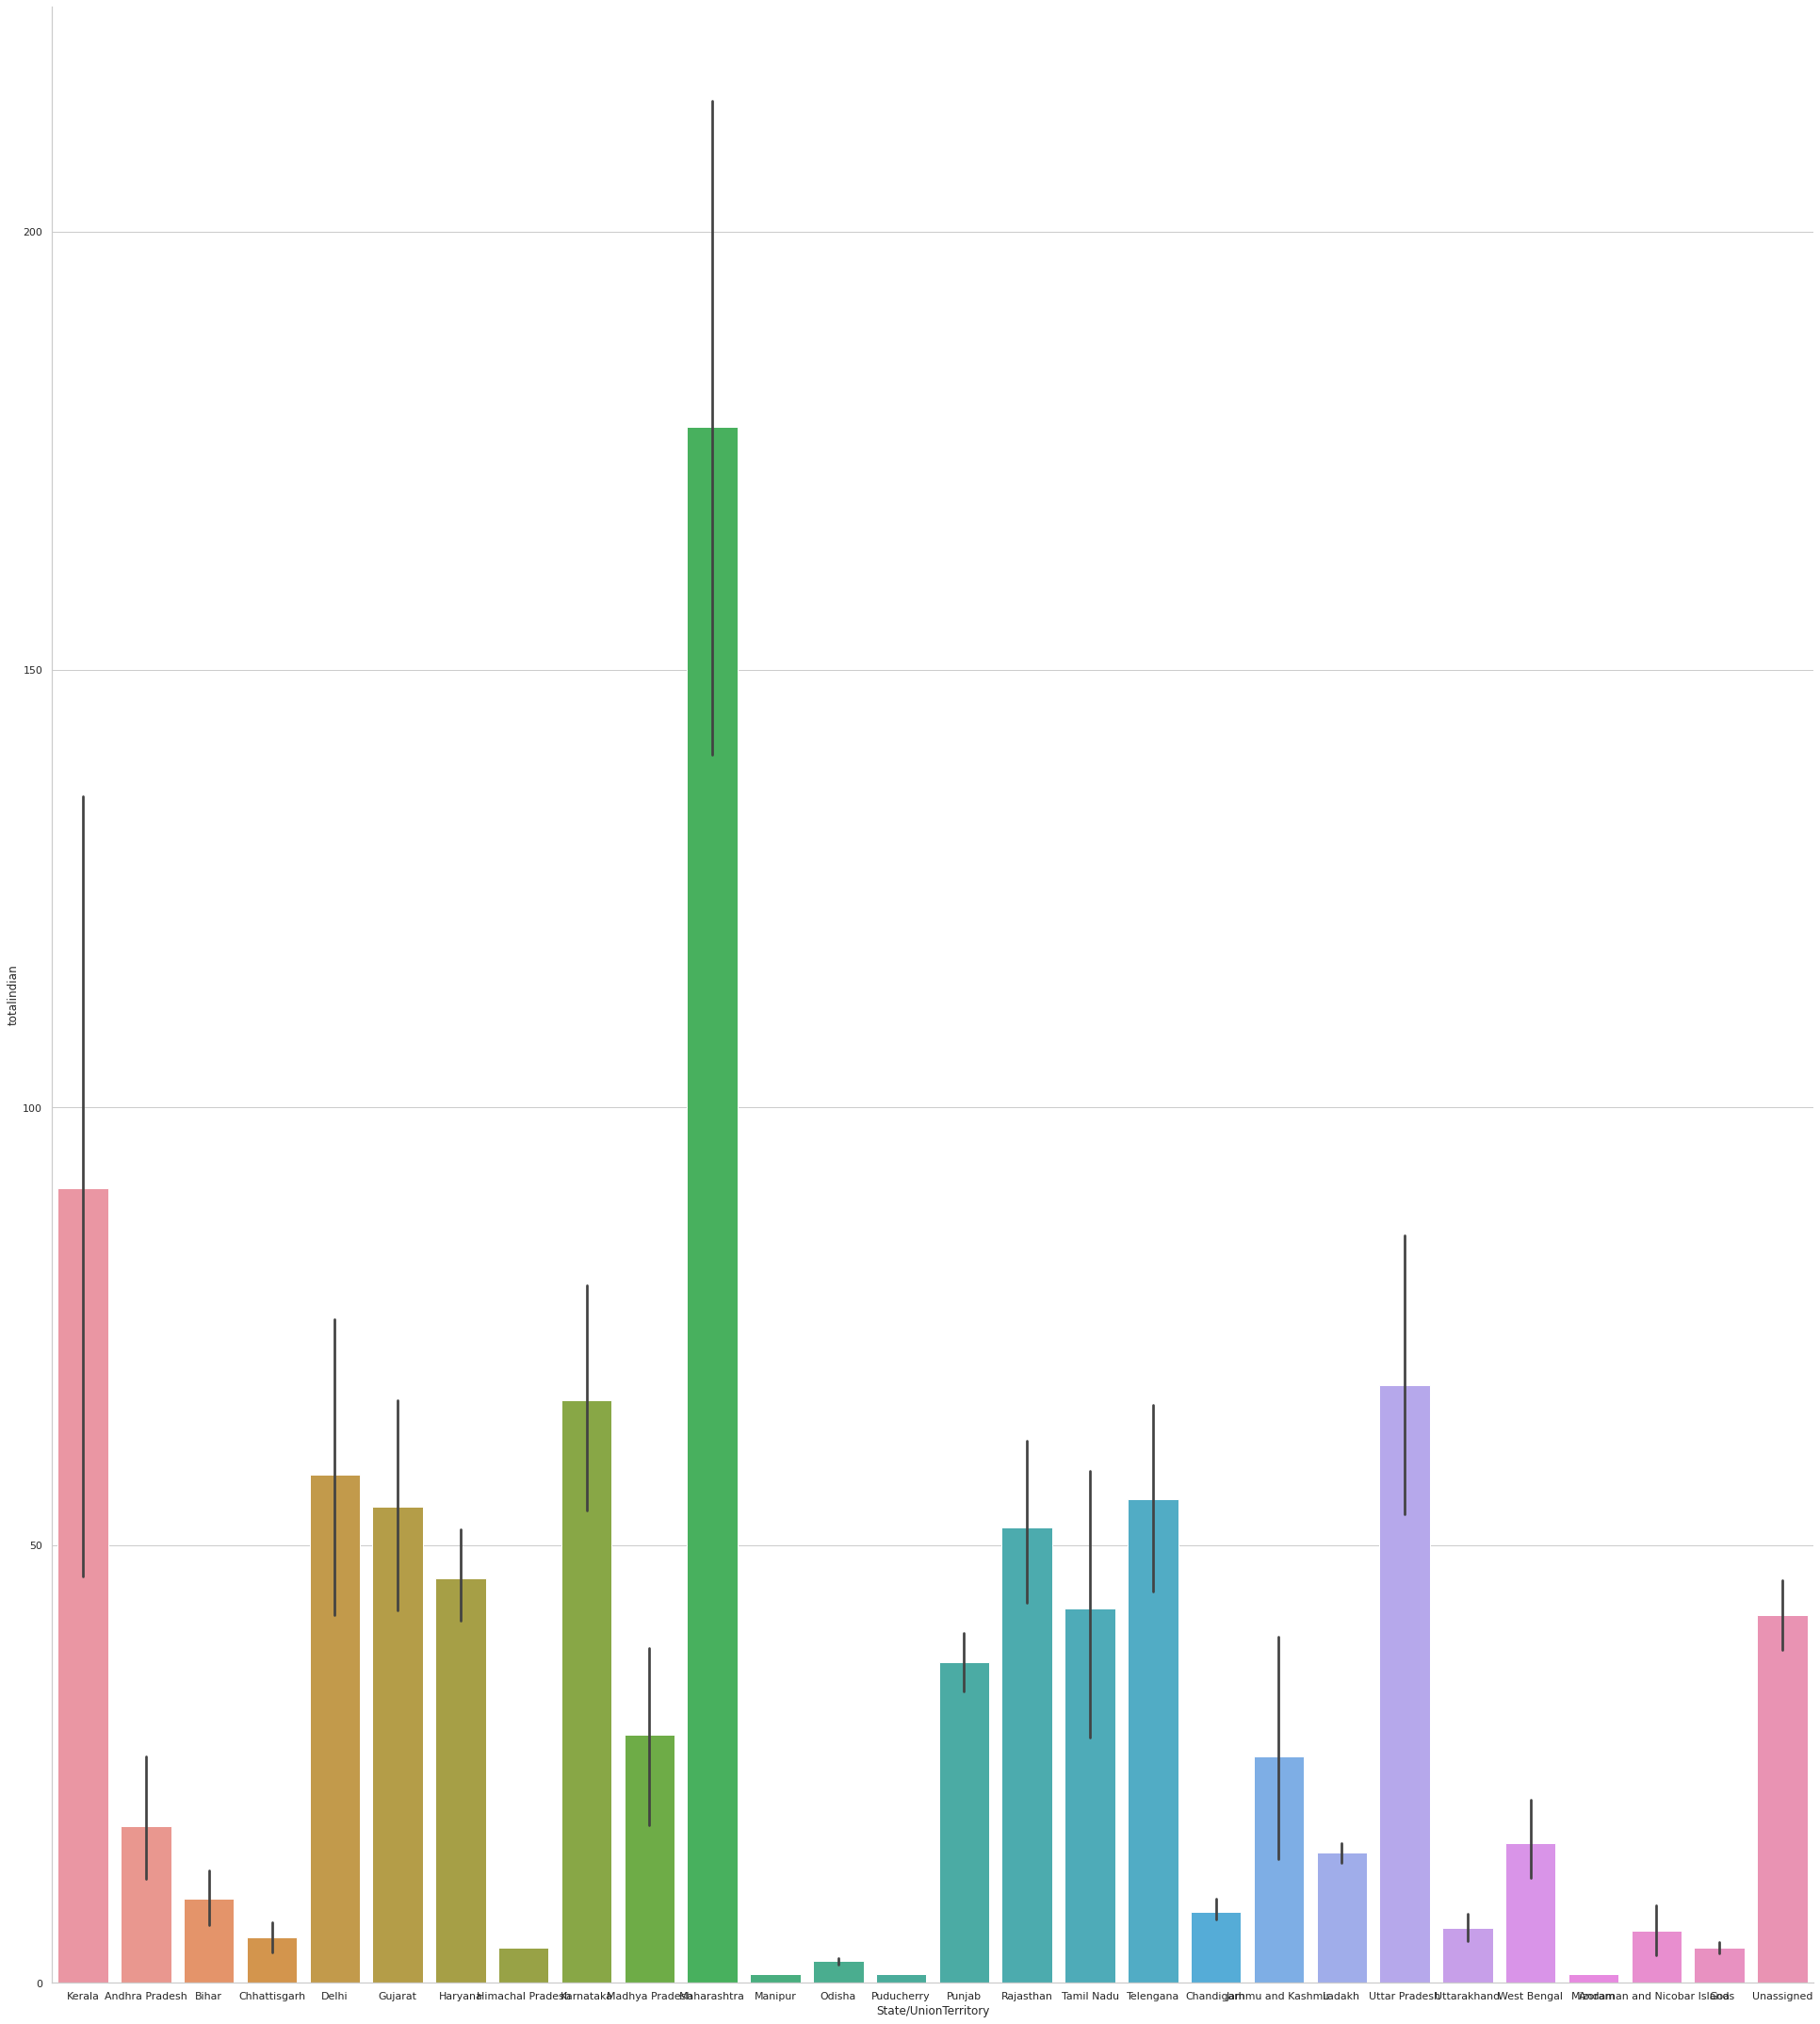

In [59]:
sb.set(style="whitegrid")
ax = sb.catplot(x="State/UnionTerritory", y="totalindian", data=data_covid, kind = "bar", height = 30, aspect = 0.9)